# Notebook to search our data
Cascade Tuholske 2021.02.15

In [286]:
# Dependencies
import pandas as pd
import os
from glob import glob
import multiprocessing as mp 
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt
import numpy as np

## Find Cities

In [4]:
C40_cities = ['Addis Ababa',
'Amman',
'Amsterdam',
'Athinai (Athens)',#'Athens',
'Auckland',
'Austin',
'Basel',#'Basel-Stadt',
'Bogota',#'Bogotá',
'Boston',
'Buenos Aires',
'Cape Town',
'Caracas',
'Chicago',
'Kbenhavn (Copenhagen)',#'Copenhagen',
'Curitiba',
'Washington, D.C.',#'District of Columbia',
'Durban (Ethekwini)',#'Durban',
'Hong Kong',
'Houston',
'Jakarta',
'Johannesburg',
'Lagos',
'Lima',
'London',
'Los Angeles',
'Madrid',
'Melbourne',
'Ciudad de Mexico (Mexico City)',#'Mexico City',
'Milano (Milan)',#'Milano',
'New Orleans',
'New York-Newark',#'New York City',
'Oslo',
'Paris',
'Philadelphia',
'Portland',#'Portland, OR',
'Pretoria', #'Pretoria - Tshwane',
'Quito',
'Rio de Janeiro',
'Roma (Rome)',#'Roma',
'Rotterdam',
'Salvador',
'San Francisco',
'Santiago',
'Seattle',
'Seoul',
'Heidelberg',#'Stadt Heidelberg',
'Stockholm',
'Sydney',
'Tokyo',
'Toronto',
'Vancouver',
'Venezia',
'Warszawa (Warsaw)']#'Warsaw',
#'Tokyo']#'Yokohama']

In [6]:
DATA_PATH = '/home/cascade/projects/UrbanHeat/data/'
ids_fn = DATA_PATH+'interim/GHS-UCDB-IDS.csv'
ids = pd.read_csv(ids_fn)

In [7]:
# Drop country from city name
ids['city_nm'] = ids['UC_NM_MN'].map(lambda X: X.split(' [')[0]) # lambda x: x.split(' ['[0]))

In [9]:
#find intersection
a = list(ids['city_nm'])
b = C40_cities
common_cities = list(set(a).intersection(set(b)))
missing_cities = list(set(b).difference(set(a)))
len(missing_cities)

# let's manually find missing cities
# country = 'Poland'
# for city in cities[cities['CTR_MN_NM']== country]['city_nm']:
#     print(city)

0

In [10]:
# merge them
df_common = pd.DataFrame()
df_common['city_nm'] = C40_cities
df_common = df_common.merge(ids, on = 'city_nm', how = 'inner')

In [12]:
df_common.to_csv(DATA_PATH+'interim/ghs-c40.csv')

## City Search

In [13]:
def search(fn): 
    """ Searches through HI max data for specific cities based on ID_HDC_G0 values
    Args:
        fn = file name
    """
    
    # Dirs and fns
    DATA_PATH = '/home/cascade/projects/UrbanHeat/data/'
    OUT_PATH = DATA_PATH+'interim/C40_HI/subset/'
    
    # year
    year = fn.split('GHS-HI_')[1].split('.csv')[0]
    
    # open C40 cities
    ids_fn = DATA_PATH+'interim/ghs-c40.csv'
    ids_df = pd.read_csv(ids_fn)
    
    # ids
    ids = list(ids_df['ID_HDC_G0'])
    
    # open df
    df = pd.read_csv(fn)
    
    # match
    df_out = df.loc[df['ID_HDC_G0'].isin(ids)]
    
    #print
    print(year,ids_df.shape,df_out.shape)
    
    # write out
    out_fn = OUT_PATH+'C40_HI_'+year+'.csv'
    df_out.to_csv(out_fn, index = False)

In [14]:
# start pools
def parallel_loop(function, dir_list, cpu_num):
    """Run the temp-ghs routine in parallel
    Args: 
        function = function to apply in parallel
        dir_list = list of dir to loop through 
        cpu_num = numper of cpus to fire  
    """ 
    start = time.time()
    pool = Pool(processes = cpu_num)
    pool.map(function, dir_list)
    # pool.map_async(function, dir_list)
    pool.close()

    end = time.time()
    print(end-start)

In [15]:
a = search
b = sorted(glob(DATA_PATH+'interim/CHIRTS_DAILY/HI/*.csv'))
c = 20

parallel_loop(function = a, dir_list = b, cpu_num = c)

1998 (58, 10) (58, 368)
1996 (58, 10) (58, 369)
1984 (58, 10) (58, 369)
1989 (58, 10) (58, 368)
2001 (58, 10) (58, 368)
1992 (58, 10) (58, 369)
1999 (58, 10) (58, 368)
2002 (58, 10) (58, 368)
1988 (58, 10) (58, 369)
1990 (58, 10) (58, 368)
1997 (58, 10) (58, 368)
1991 (58, 10) (58, 368)
1987 (58, 10) (58, 368)
1986 (58, 10) (58, 368)
1985 (58, 10) (58, 368)
1994 (58, 10) (58, 368)
1993 (58, 10) (58, 368)
1995 (58, 10) (58, 368)
2000 (58, 10) (58, 369)
1983 (58, 10) (58, 368)
2003 (58, 10) (58, 368)
2004 (58, 10) (58, 369)
2005 (58, 10) (58, 368)
2006 (58, 10) (58, 368)
2007 (58, 10) (58, 368)
2012 (58, 10) (58, 369)
2008 (58, 10) (58, 369)
2013 (58, 10) (58, 368)
2010 (58, 10) (58, 368)
2016 (58, 10) (58, 369)
2009 (58, 10) (58, 368)
2011 (58, 10) (58, 368)
2015 (58, 10) (58, 368)
2014 (58, 10) (58, 368)
1.6536870002746582


## Merge it all

In [16]:
fn_list = glob(DATA_PATH+'interim/C40_HI/subset/*.csv')

In [137]:
pd.read_csv(fn_list[0]).head(1)

,Unnamed: 0,ID_HDC_G0,CTR_MN_NM,2010.01.01,2010.01.02,2010.01.03,2010.01.04,2010.01.05,2010.01.06,2010.01.07,...,2010.12.22,2010.12.23,2010.12.24,2010.12.25,2010.12.26,2010.12.27,2010.12.28,2010.12.29,2010.12.30,2010.12.31
0,23,2493,Norway,-7.395024,-9.238755,-12.680681,-10.468003,-12.413922,-19.293702,-16.388572,...,-15.092358,-11.527999,-11.742256,-11.237653,-1.728042,-2.515468,-5.09265,-10.870645,-9.300386,4.336634


In [17]:
dfs_list = []

for fn in fn_list:
    df = pd.read_csv(fn)
    dfs_list.append(df.iloc[:,3:])

In [18]:
df_all = pd.concat(dfs_list, axis = 1)

## 95 pct

In [168]:
q95 = df_all.quantile(q=0.95, axis=1, numeric_only=True, interpolation='linear')

In [169]:
nms = pd.read_csv(fn_list[0])
nms = nms[['ID_HDC_G0']]

In [170]:
q95_df = pd.DataFrame()
q95_df['ID_HDC_G0'] = pd.read_csv(fn_list[0])['ID_HDC_G0']
q95_df['q95'] = q95

In [171]:
# open C40 cities & Merge
ids_fn = DATA_PATH+'interim/ghs-c40.csv'
ids_df = pd.read_csv(ids_fn)#.drop('Unnamed: 0')

q95_df = q95_df.merge(ids_df, on = 'ID_HDC_G0', how = 'inner')
q95_df = q95_df.drop(columns = 'Unnamed: 0')

## Days Per Year > 95%

In [189]:
def q95_search(zip_id_list): 
    """ Searches through HI max data for specific cities based on ID_HDC_G0 values
    Args:
        zip_id_list = ID_HDC_G0 & q96 zipped into a list
    """
    
    year_list = []
    q95_list = []
    days_list = []
    id_list =[]
    
    # Dirs and fns
    DATA_PATH = '/home/cascade/projects/UrbanHeat/data/'
    OUT_PATH = DATA_PATH+'interim/C40_HI/subset/'
    
    # Get files
    fn_list = glob(DATA_PATH+'interim/C40_HI/subset/*.csv')

    for zip_id in zip_id_list:
        for fn in fn_list:

            # get year
            year = fn.split('C40_HI_')[1].split('.csv')[0]

            # open & subset
            df = pd.read_csv(fn)
            df = df[df['ID_HDC_G0'] == zip_id[0]]

            # number of days per year > q95
            arr = df.iloc[:,3:].to_numpy();
            days = len(arr[arr > zip_id[1]])
           
            # append lists
            id_list.append(zip_id[0])
            q95_list.append(zip_id[1])
            year_list.append(year)
            days_list.append(days)
    
    # create df for return 
    df_out = pd.DataFrame()
    df_out['ID_HDC_G0'] = id_list
    df_out['q95'] = q95_list
    df_out['year'] = year_list
    df_out['q95_days'] = days_list
    
    return df_out


#     # open C40 cities
#     ids_fn = DATA_PATH+'interim/ghs-c40.csv'
#     ids_df = pd.read_csv(ids_fn)
    
#     # ids
#     ids = list(ids_df['ID_HDC_G0'])
    
#     # open df
#     df = pd.read_csv(fn)
    
#     # match
#     df_out = df.loc[df['ID_HDC_G0'].isin(ids)]
    
#     #print
#     print(year,ids_df.shape,df_out.shape)
    
#     # write out
#     out_fn = OUT_PATH+'C40_HI_'+year+'.csv'
#     df_out.to_csv(out_fn, index = False)

In [190]:
q95_list = list(zip(list(q95_df['ID_HDC_G0']),list(q95_df['q95'])))

In [191]:
df_days = q95_search(q95_list)

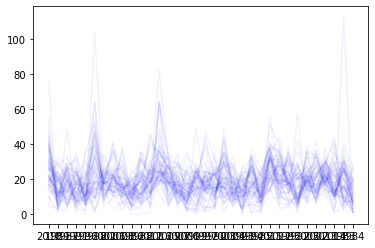

In [197]:
ids_list = list(ids_df['ID_HDC_G0'])

for ids in ids100:
    data = df_days[df_days['ID_HDC_G0'] == ids]
    
    x = data['year']
    y = data['q95_days']
    plt.plot(x,y, alpha = 0.05, color = 'blue')

In [246]:
merge = ids_df.drop(columns = ['Unnamed: 0','UC_NM_MN'])
df_days = df_days.merge(merge, on = 'ID_HDC_G0', how = 'left')

In [247]:
df_days['year'] = df_days['year'].astype('int')

In [248]:
df_days

,ID_HDC_G0,q95,year,q95_days,city_nm,CTR_MN_NM,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
0,2493,23.741513,2010,6,Oslo,Norway,59.908232,10.743248,Europe,Northern Europe,Northern Europe
1,2493,23.741513,1989,21,Oslo,Norway,59.908232,10.743248,Europe,Northern Europe,Northern Europe
2,2493,23.741513,1987,5,Oslo,Norway,59.908232,10.743248,Europe,Northern Europe,Northern Europe
3,2493,23.741513,1991,17,Oslo,Norway,59.908232,10.743248,Europe,Northern Europe,Northern Europe
4,2493,23.741513,1996,19,Oslo,Norway,59.908232,10.743248,Europe,Northern Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...
1967,13023,33.655288,2002,21,Melbourne,Australia,-37.855562,145.074705,Oceania,Australia and New Zealand,Australia and New Zealand
1968,13023,33.655288,2013,30,Melbourne,Australia,-37.855562,145.074705,Oceania,Australia and New Zealand,Australia and New Zealand
1969,13023,33.655288,2014,21,Melbourne,Australia,-37.855562,145.074705,Oceania,Australia and New Zealand,Australia and New Zealand
1970,13023,33.655288,1983,21,Melbourne,Australia,-37.855562,145.074705,Oceania,Australia and New Zealand,Australia and New Zealand


## Get population

In [224]:
pop_fn = DATA_PATH+'interim/GHS-UCDB-Interp.csv'
pop = pd.read_csv(pop_fn)

In [225]:
ids_list = list(ids_df['ID_HDC_G0'])

In [226]:
# match
pop = pop.loc[pop['ID_HDC_G0'].isin(ids_list)]
pop = pop.drop(columns = 'Unnamed: 0')

In [227]:
# go from wide to long and fix columns
pop = pd.wide_to_long(pop, ["P"], i="ID_HDC_G0", j="year")
pop.rename({'P' : 'Pop'}, axis = 1, inplace = True)
pop = pop.reset_index()

In [249]:
df_final = pd.merge(df_days, pop,  how='left', on=['ID_HDC_G0','year'])

In [251]:
fn_out = DATA_PATH+'interim/C40_HI/C40_q95_HeatExposure.csv'
df_final.to_csv(fn_out)

In [252]:
for col in df_final.columns:
    print(col)

ID_HDC_G0
q95
year
q95_days
city_nm
CTR_MN_NM
GCPNT_LAT
GCPNT_LON
region
sub-region
intermediate-region
Pop


## Plot

Text(0.5, 0, 'Year')

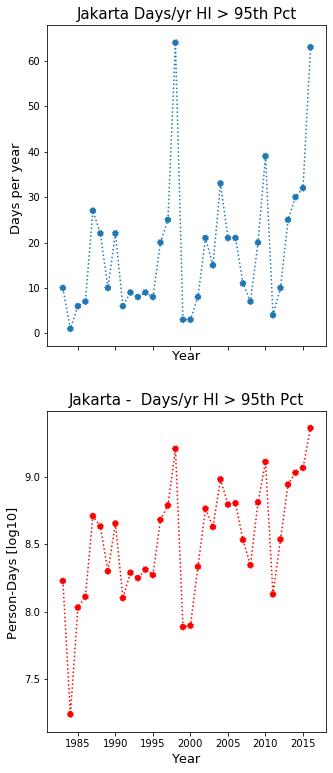

In [292]:
#### Make Figure & Save it


fig, axs = plt.subplots(2, 1, figsize = (5, 13), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

# plot
name = 'Jakarta'
data = df_final[df_final['city_nm'] == name].sort_values('year')

axs[0].plot(data['year'],data['q95_days'],  linestyle = ':')
axs[0].scatter(data['year'],data['q95_days'],  linestyle = ':')
axs[0].set_title(name+' Days/yr HI > 95th Pct', fontsize = 15);
axs[0].set_ylabel('Days per year ', fontsize = 13)
axs[0].set_xlabel('Year', fontsize = 13)

axs[1].plot(data['year'],np.log10(data['q95_days']*data['Pop']),  linestyle = ':', color = 'red')
axs[1].scatter(data['year'],np.log10(data['q95_days']*data['Pop']),  linestyle = ':', color = 'red')
axs[1].set_title(name+' -  Days/yr HI > 95th Pct', fontsize = 15);
axs[1].set_ylabel('Person-Days [log10] ', fontsize = 13)
axs[1].set_xlabel('Year', fontsize = 13)